# Categorical data analysis

Oliver W. Layton

CS 251: Data Analysis and Visualization

Fall 2023

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from categorical_data import CatData
from categorical_analysis import CatAnalysis
import charts

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 12})
plt.show()

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Exploratory data analysis

Let's go through the exploratory data analysis process with the Austin Pet dataset with an example question.

### 1. Ask a question that you would like answered about the dataset, informed by the available data variables.

**Our question: Do animals arrive at the shelter more or less frequently at certain times of the year?**

Load in `austin_pet.csv` using `CatData` class from Project 2 (builds on `Data` class from Project 1) then look at a summary of the loaded dataset.

In [17]:
pet_data = CatData('data/austin_pet_no_missing.csv')
print(pet_data)

-------------------------------
data/austin_pet_no_missing.csv (197600x23)
Headers:
  animal_id	in_reason	in_condition	animal_type	breed	color	in_year	in_month	in_day	in_hour	found_state	sex	in_age_years	outcome	outcome_subtype	out_year	out_month	out_day	out_hour	out_age_years	dob_month	dob_day	dob_year
-------------------------------
Showing first 5/197600 rows.
521520.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
664235.0	0.0	0.0	1.0	1.0	1.0	0.0	0.0	0.0	1.0	0.0	1.0	0.02	1.0	1.0	0.0	0.0	0.0	1.0	1.0	0.0	1.0	1.0
664237.0	0.0	0.0	1.0	1.0	1.0	0.0	0.0	0.0	1.0	0.0	1.0	0.02	1.0	1.0	0.0	0.0	0.0	1.0	1.0	0.0	1.0	1.0
664236.0	0.0	0.0	1.0	1.0	1.0	0.0	0.0	0.0	1.0	0.0	1.0	0.02	1.0	1.0	0.0	0.0	0.0	1.0	1.0	0.0	1.0	1.0
664233.0	0.0	1.0	0.0	2.0	2.0	0.0	0.0	0.0	1.0	0.0	0.0	3.0	2.0	2.0	0.0	0.0	0.0	0.0	2.0	0.0	2.0	2.0

-------------------------------


### 2. Decide which one (or several) variables could be used to help answer the question.

In terms of arrival times, we have the following related variables in the dataset:
- `in_year`: Year of arrival
- `in_month`: Month of arrival
- `in_day`: Day of arrival
- `in_hour`: Hour of arrival

Since we are interested in the arrivals over the course of the year, let's focus on `in_month`. Let's see what all the possible levels are.

In [18]:
# NOTE: They are not sorted by default. Why?
pet_data.get_cat_levels_str('in_month')

array(['10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08',
       '09', 'Missing'], dtype='<U7')

### 3. Run an appropriate analysis (e.g. count number of samples in each categorical level).

Let's count the number of times animals arrived in each month to address our guiding question.

We will make use of the `cat_count` method of the `CatAnalysis` class (inherits from our Project 1 `Analysis` class).

In [19]:
pet_an = CatAnalysis(pet_data)
counts, level_strs = pet_an.cat_count('in_month')
print('in_month Levels:')
print(level_strs)
print('Counts of each level:')
print(counts)

in_month Levels:
['10' '11' '12' '01' '02' '03' '04' '05' '06' '07' '08' '09' 'Missing']
Counts of each level:
[17737 15704 14595 14712 13379 15664 15882 19968 19017 17104 16476 16546
   816]


### 4. Create a well-labeled plot showing the results.

Since we have count data, we want to create a type of **bar chart** called a **histogram**:
- One plot axis: levels
- Other plot axis: counts of each level

This is implemented in the `sidebarplot` function in `charts.py`.

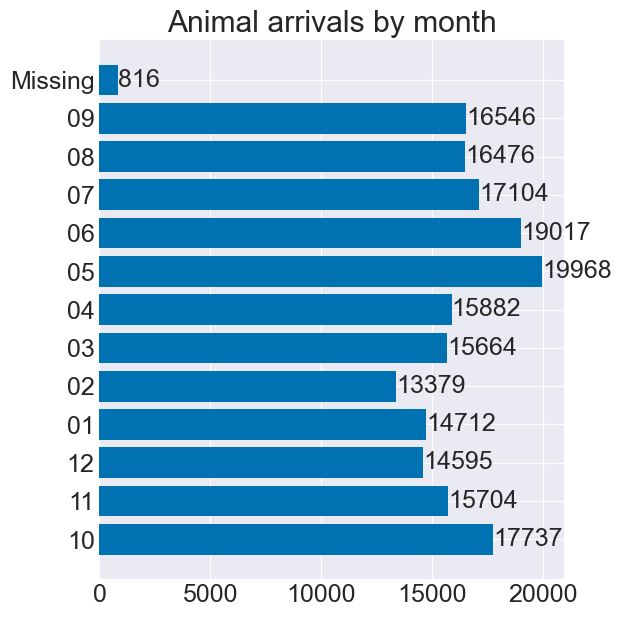

In [20]:
charts.sidebarplot(counts, level_strs, title='Animal arrivals by month')

Notice the months are not chronologically sorted! We should sort by month — is this the **label** (levels) or by the **value** (counts)?

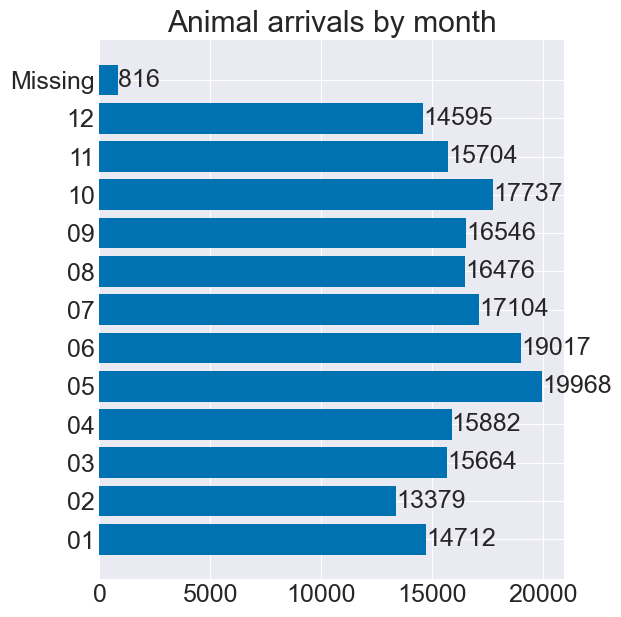

In [21]:
charts.sidebarplot(counts, level_strs, title='Animal arrivals by month', sort_by='label')

We can also sort by bar length to highlight the months with the top (and smallest) counts:

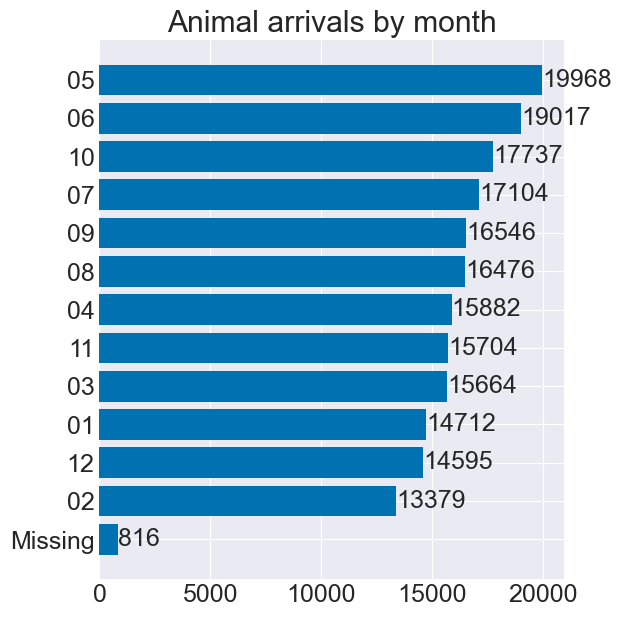

In [22]:
charts.sidebarplot(counts, level_strs, title='Animal arrivals by month', sort_by='value')

### 5. Interpret the plot

In a few sentences, what are the biggest take-aways? What did we learn through this analysis?

## Why side bar plot?

Why did we place the levels on the y axis and the counts on the x axis, rather than the other way around? To see why, let's count the different pet breeds that have gone through the shelter and make a bar chart of the 5 most common animal breeds showing the results.

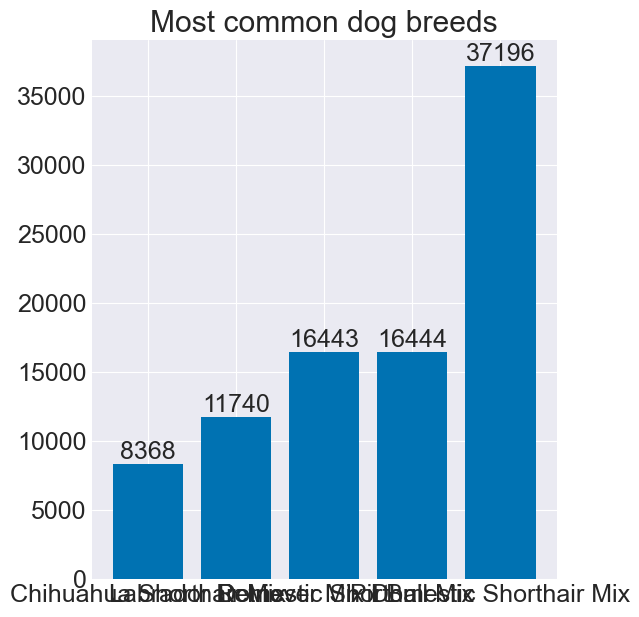

In [23]:
counts, level_strs = pet_an.cat_count('breed')
charts.barplot(counts, level_strs, title='Most common dog breeds', sort_by='value', limit_top_k=5)

Not terrible (except we cannot read the labels). Let's focus on the top 30 breeds.

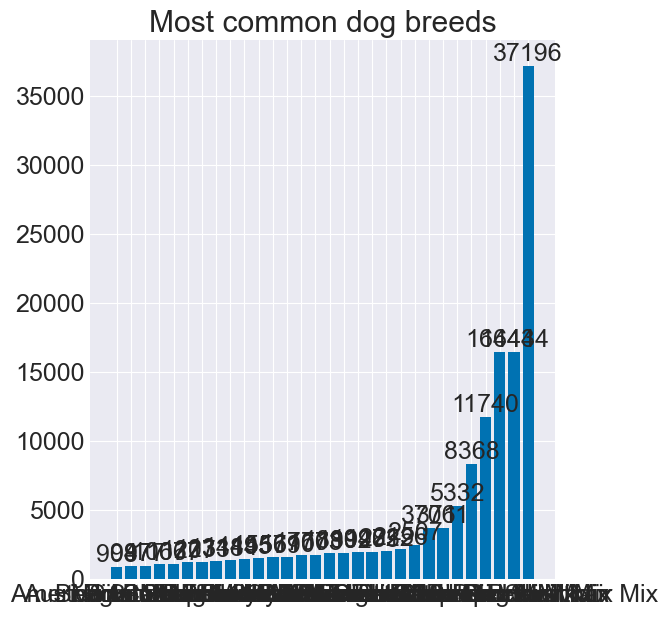

In [24]:
charts.barplot(counts, level_strs, title='Most common dog breeds', sort_by='value', limit_top_k=30)

Yikes! Not great! Let's try the side bar chart.

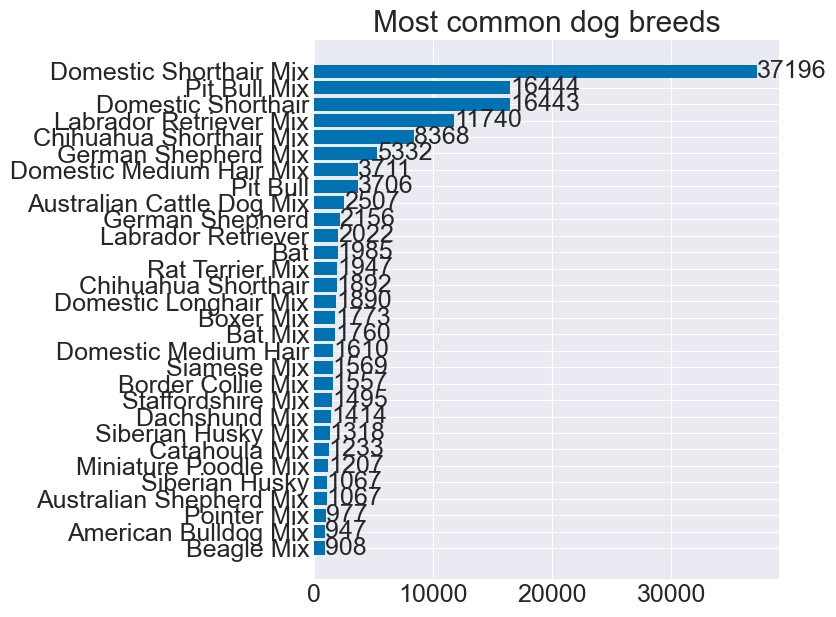

In [25]:
charts.sidebarplot(counts, level_strs, title='Most common dog breeds', sort_by='value', limit_top_k=30)

Much better! We could decrease the font size and add more breeds, without sacrificing clarity.

**Benefits of side bar chart (vs "regular"):**
- Scales much better to high numbers of levels / labels.
- No need to rotate labels/numbers.
- Vertical layout more conductive to placing your plot on a sheet of paper (or phone/tablet due to vertical scrolling).

## Filtering data

Another common way to use categorical data is using the levels as **filters** to analyze only a subset of the dataset. For example, we are interested in focusing on how many **DOG** breeds have gone through the shelter. In other words, not counting cat or other animal breeds.

Dog is a level of the variable `animal_type`. Let's filter the Austin Pet dataset by this level — **Only select samples that have the level Dog as a value for the `animal_type` variable.**

In [26]:
# Print number of samples before/after filtering by dog
print('Number of samples before filtering by dog:', pet_data.get_num_samples())
pet_data.filter('animal_type', 'Dog')
print('Number of samples after filtering by dog:', pet_data.get_num_samples())

Number of samples before filtering by dog: 197600
Number of samples after filtering by dog: 123525


Now we can count the number of breeds (like before) and plot the counts with the side bar chart.

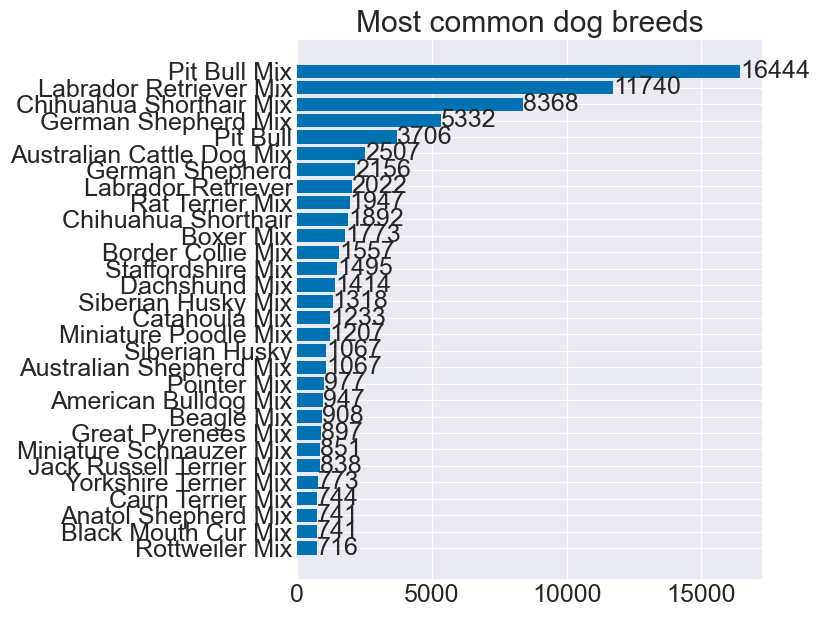

In [27]:
counts, level_strs = pet_an.cat_count('breed')
charts.sidebarplot(counts, level_strs, title='Most common dog breeds', sort_by='value', limit_top_k=30)

#### Notes

- You can filter a dataset by more than one condition (*e.g. only dogs that arrive in the month of October*).
- When running new analyses after filtering, you usually should **reset the dataset** (i.e. restore the original unfiltered version).

Let's reset the dataset and print out the number of samples.

In [28]:
print('Number of samples before resetting dataset:', pet_data.get_num_samples())
pet_data.reset_dataset()
print('Number of samples after resetting dataset:', pet_data.get_num_samples())

Number of samples before resetting dataset: 123525
Number of samples after resetting dataset: 197600
